# Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#dataset import
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes

# machine learning library
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# machine learning accuracy
from sklearn.metrics import accuracy_score

In [ ]:
import sklearn
import matplotlib
import warnings
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print("nump",np.__version__)
print('pandas',pd.__version__)
print('seaborn',sns.__version__)
print('matplt',matplotlib.__version__)

The scikit-learn version is 1.0.2.
nump 1.21.6
pandas 1.3.5
seaborn 0.11.2
matplt 3.2.2


# Data Importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
location ='drive/MyDrive/Machine Learning/'

# please note this change and "hack" if you will, only for
# demo purposes with this implementation
df = pd.read_csv(location+"healthcare-dataset-stroke-data.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##Importing and Loading other datasets

In [ ]:
# diabetes = load_diabetes()
# diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

heart_df = pd.read_csv(location+"heart.csv")

Text(0.5, 1.0, 'Column_Names v/s Null_Values')

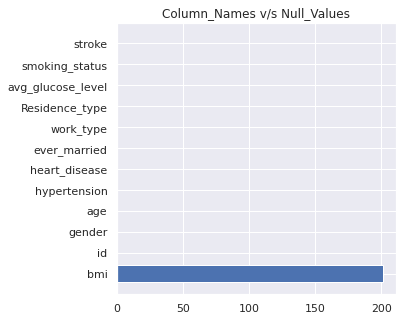

In [ ]:
#stroke dataset
plt.figure(figsize=(5,5))
null_v = pd.DataFrame(df.isnull().sum())
s = null_v.sort_values(by = [0],ascending= False,).head(100)
plt.barh(s.index,s[0])
plt.title('Column_Names v/s Null_Values')

Text(0.5, 1.0, 'Column_Names v/s Null_Values')

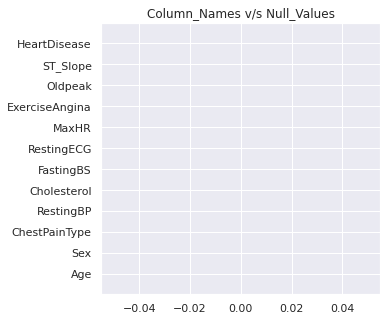

In [ ]:
#heart dataset
plt.figure(figsize=(5,5))
null_v = pd.DataFrame(heart_df.isnull().sum())
s = null_v.sort_values(by = [0],ascending= False,).head(100)
plt.barh(s.index,s[0])
plt.title('Column_Names v/s Null_Values')

Text(0.5, 1.0, 'Column_Names v/s Null_Values')

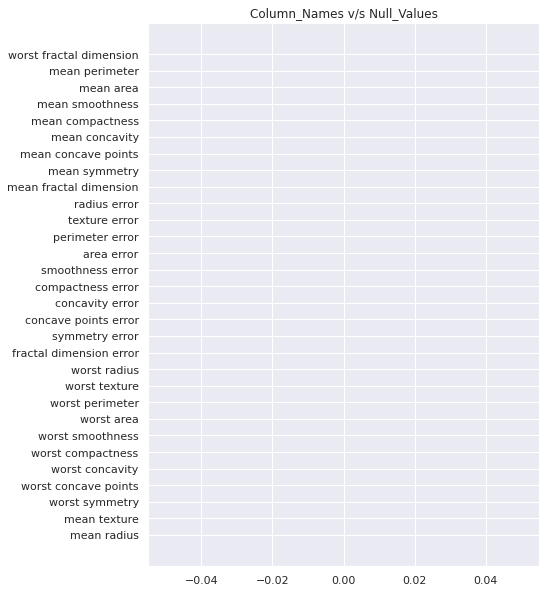

In [ ]:
#breast cancer dataset
plt.figure(figsize=(7,10))
null_v = pd.DataFrame(breast_cancer_df.isnull().sum())
s = null_v.sort_values(by = [0],ascending= False,).head(100)
plt.barh(s.index,s[0])
plt.title('Column_Names v/s Null_Values')

# Data Preprocessing

In [ ]:
#Dropping the null values by setting the threshold to 98 %
df_clean = df.dropna(thresh = df.shape[0]*0.98,how = 'all',axis =1)
df_clean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0


### Label Encoding

In [ ]:
import warnings
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df_clean['gender']= label_encoder.fit_transform(df_clean['gender'])
df_clean['ever_married']= label_encoder.fit_transform(df_clean['ever_married'])
df_clean['work_type']= label_encoder.fit_transform(df_clean['work_type'])
df_clean['Residence_type']= label_encoder.fit_transform(df_clean['Residence_type'])
df_clean['smoking_status']= label_encoder.fit_transform(df_clean['smoking_status'])


warnings.filterwarnings('ignore')
df_clean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,1,0


In [ ]:
heart_df['Sex'] = label_encoder.fit_transform(heart_df['Sex'])
heart_df['ChestPainType']= label_encoder.fit_transform(heart_df['ChestPainType'])
heart_df['RestingECG']= label_encoder.fit_transform(heart_df['RestingECG'])
heart_df['ExerciseAngina']= label_encoder.fit_transform(heart_df['ExerciseAngina'])
heart_df['ST_Slope']= label_encoder.fit_transform(heart_df['ST_Slope'])

warnings.filterwarnings('ignore')
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


#Train-Test Split

###Stroke Dataset

In [ ]:
X1= df_clean.drop(axis="columns",labels="stroke")
X= df_clean.iloc[:,:-1].values
y = df_clean.iloc[:,-1:].values
X_train, X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2, random_state=0)

###Heart Dataset

In [ ]:
heart_X = heart_df.iloc[:,:-1].values
heart_y = heart_df.iloc[:,-1:].values
heart_X_train, heart_X_test, heart_y_train, heart_y_test = train_test_split(heart_X, heart_y, test_size = 0.2, random_state=0)

###Diabetes Dataset

In [ ]:
# diabetes_X = diabetes.data
# diabetes_y = diabetes.target

# diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=0)

###Breast cancer dataset

In [ ]:
breast_cancer_X = breast_cancer.data
breast_cancer_y = breast_cancer.target

breast_cancer_X_train, breast_cancer_X_test, breast_cancer_y_train, breast_cancer_y_test = train_test_split(breast_cancer_X, breast_cancer_y, test_size=0.2, random_state=0)

#Feature Importance


In [ ]:
classifier = RandomForestClassifier(n_estimators= 10, criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
myclassifier = pd.Series(classifier.feature_importances_, index= X1.columns)
myclassifier  = myclassifier.sort_values(ascending=False)

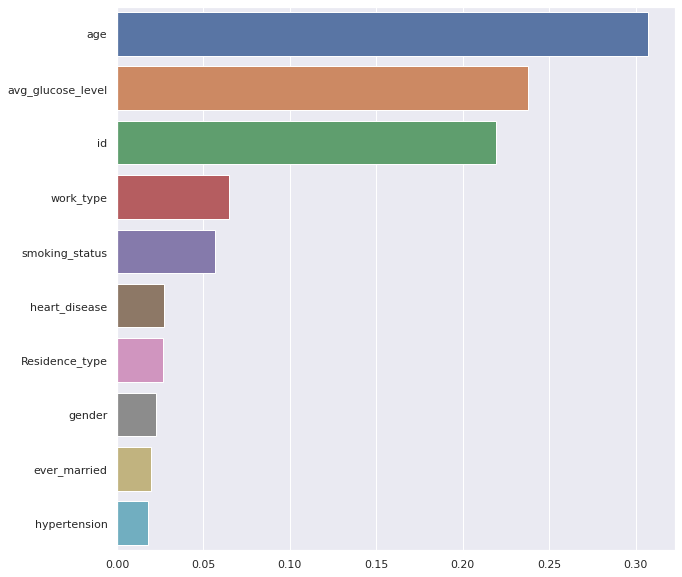

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.set()
p = sns.barplot(myclassifier.head(1000), myclassifier.index
                [:100],orient = 'h')

Correlation Matrix for stroke
 dataset

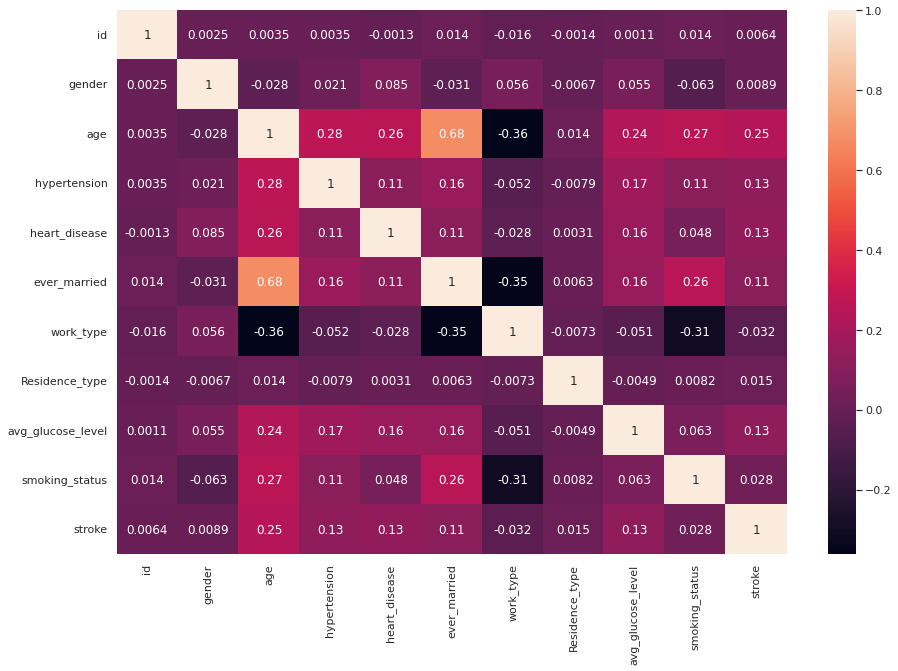

In [ ]:
corr_matrix_stroke = df_clean.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix_stroke, annot=True)
plt.show()

Correlation Matrix for diabetes dataset

In [ ]:
# corr_matrix_diabetes = diabetes_df.corr()
# plt.figure(figsize=(15,10))
# sns.heatmap(corr_matrix_diabetes, annot=True)
# plt.show()

Correlation Matrix for breast cancer dataset

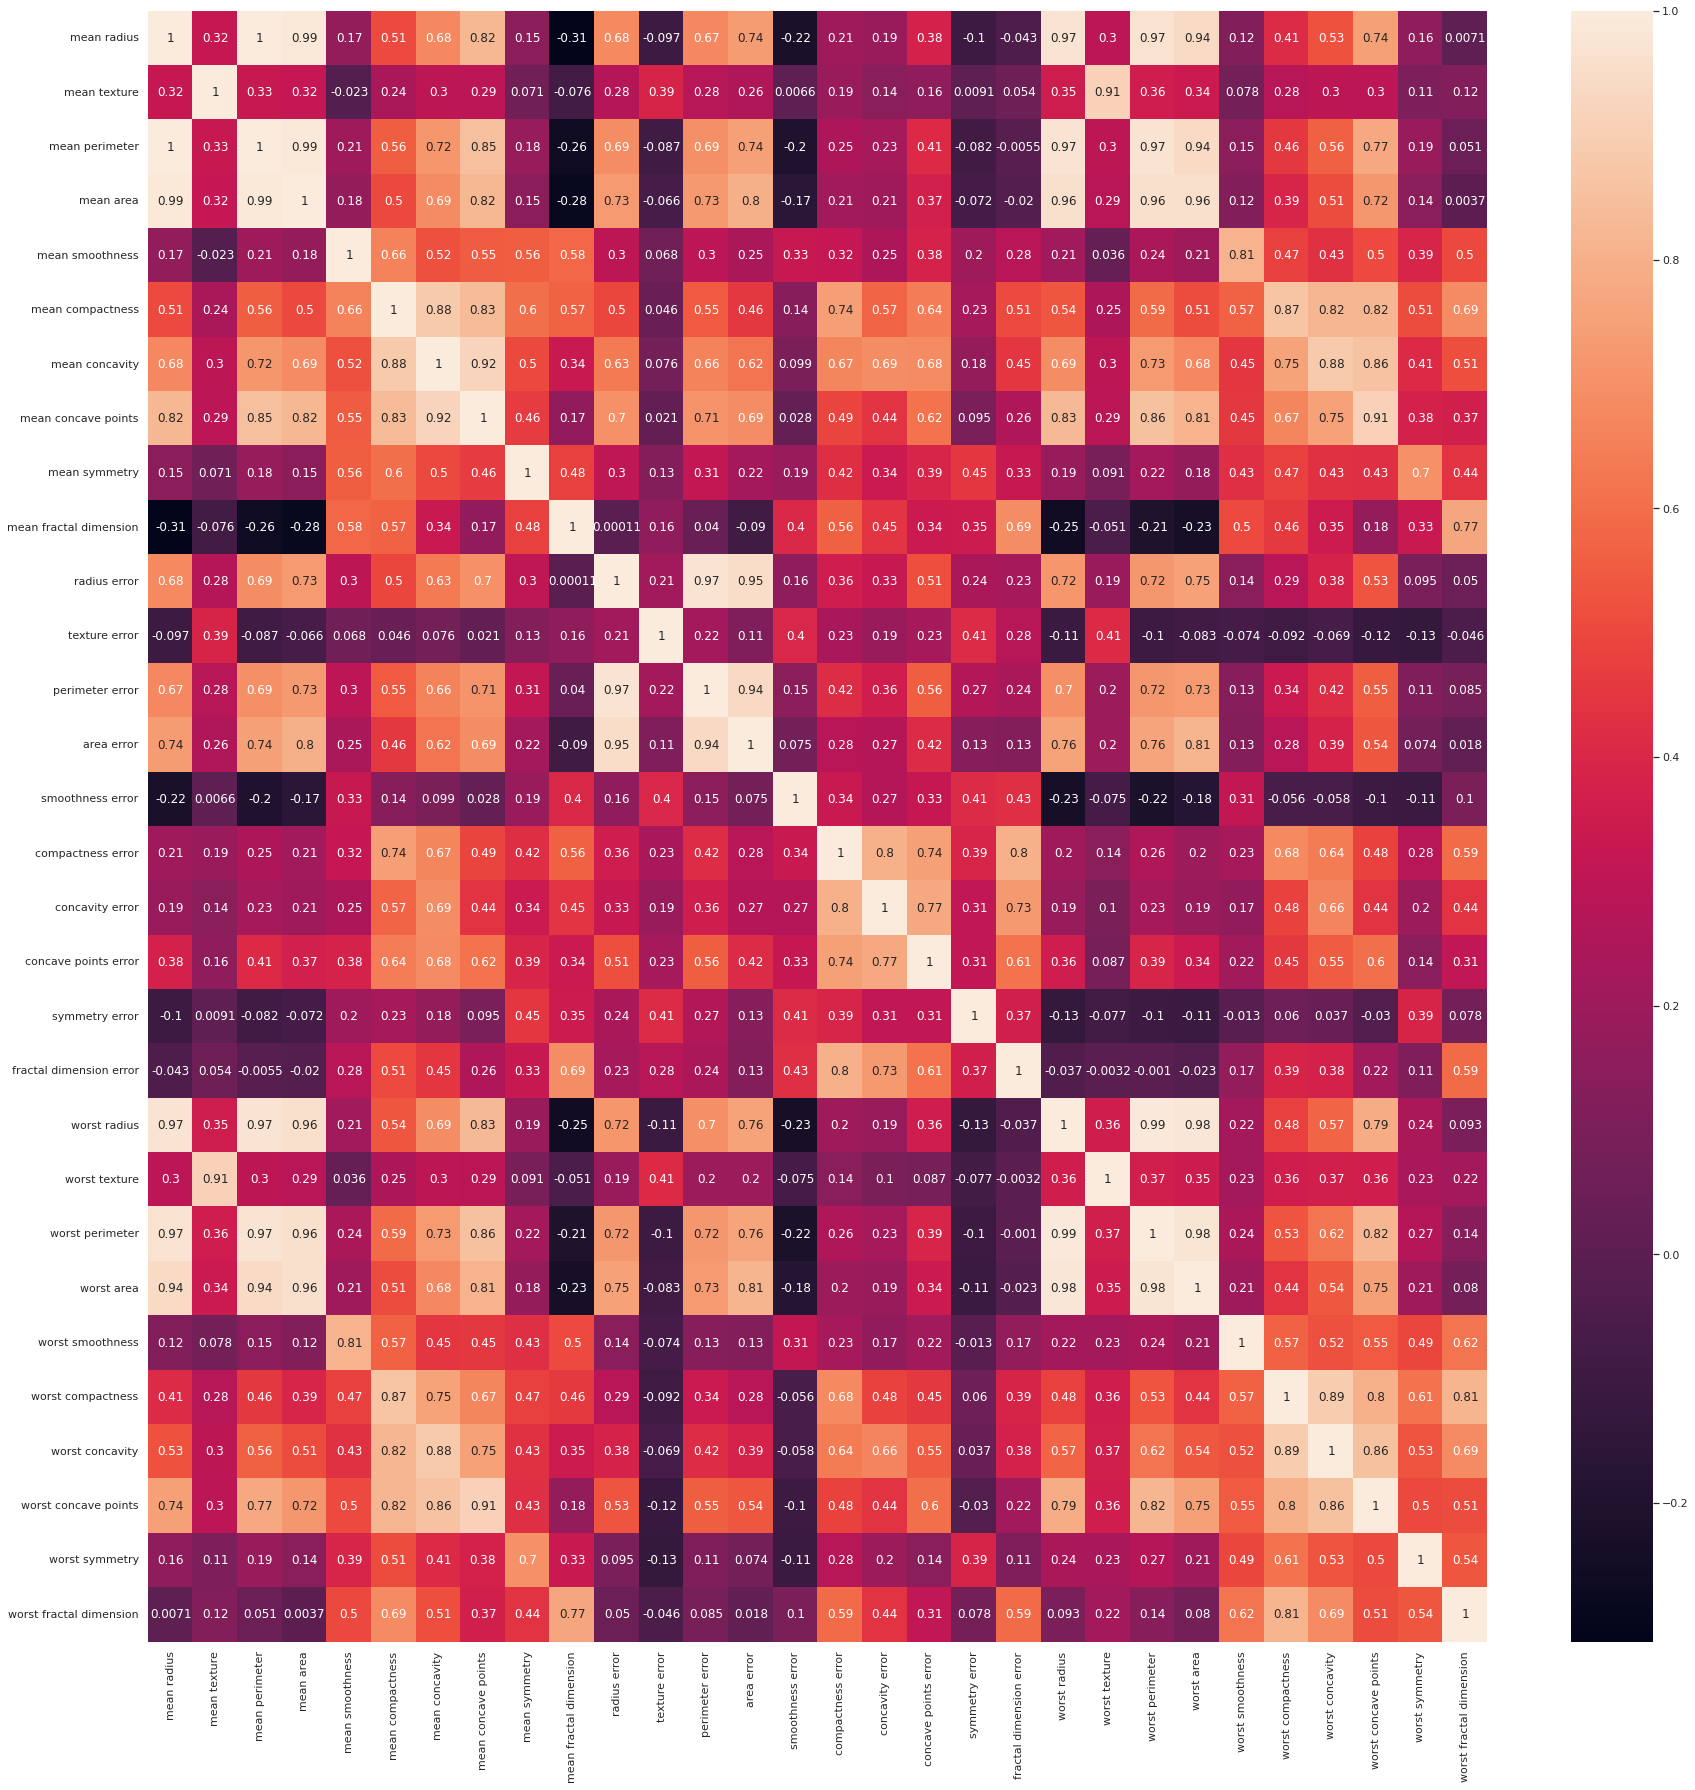

In [ ]:
corr_matrix_breast = breast_cancer_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix_breast, annot=True)
plt.show()

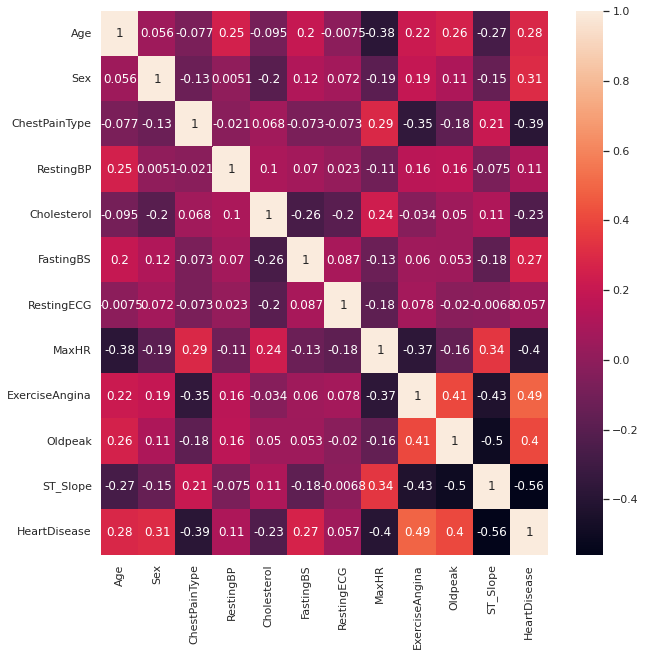

In [ ]:
corr_matrix_heart = heart_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix_heart, annot=True)
plt.show()

#Machine Learning Algorithms

### Decision Tree

In [ ]:
decision_tree_model = DecisionTreeClassifier()

Stroke dataset

In [ ]:
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
stroke_test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",stroke_test_accuracy*100)

Accuracy: 91.58512720156556


Diabetes Dataset

Heart Dataset

In [ ]:
decision_tree_model.fit(heart_X_train, heart_y_train)
heart_y_pred_dt = decision_tree_model.predict(heart_X_test)
heart_test_accuracy = accuracy_score(heart_y_test, heart_y_pred_dt)
print("Accuracy:",heart_test_accuracy*100)

Accuracy: 73.91304347826086


Breast Cancer Dataset

In [ ]:
decision_tree_model.fit(breast_cancer_X_train, breast_cancer_y_train)
breast_cancer_y_pred_dt = decision_tree_model.predict(breast_cancer_X_test)
breast_cancer_accuracy = accuracy_score(breast_cancer_y_test, breast_cancer_y_pred_dt)
print("Accuracy:",breast_cancer_accuracy*100)

Accuracy: 90.35087719298247


### Naive Bayes

In [ ]:
gaussian_nb_model = GaussianNB()

Stroke dataset

In [ ]:
gaussian_nb_model.fit(X_train,y_train)
y_pred2 = gaussian_nb_model.predict(X_test)
stroke_test_accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:",stroke_test_accuracy*100)

Accuracy: 92.85714285714286


Heart Dataset

In [ ]:
gaussian_nb_model.fit(heart_X_train, heart_y_train)
heart_y_pred_nb = gaussian_nb_model.predict(heart_X_test)
heart_test_accuracy = accuracy_score(heart_y_test, heart_y_pred_nb)
print("Accuracy:",heart_test_accuracy*100)

Accuracy: 84.78260869565217


Breast Cancer Dataset

In [ ]:
gaussian_nb_model.fit(breast_cancer_X_train, breast_cancer_y_train)
breast_cancer_y_pred_nb = gaussian_nb_model.predict(breast_cancer_X_test)
breast_cancer_accuracy = accuracy_score(breast_cancer_y_test, breast_cancer_y_pred_nb)
print("Accuracy:",breast_cancer_accuracy*100)

Accuracy: 92.98245614035088


### K Nearest Neighbors

In [ ]:
knn_model = KNeighborsClassifier()

Stroke dataset

In [ ]:
knn_model.fit(X_train,y_train)
y_pred3 = knn_model.predict(X_test)
modelKNN = accuracy_score(y_test, y_pred3)
print("Accuracy:",modelKNN*100)

Accuracy: 94.52054794520548


Heart Dataset

In [ ]:
knn_model.fit(heart_X_train, heart_y_train)
heart_y_pred_knn = knn_model.predict(heart_X_test)
heart_test_accuracy = accuracy_score(heart_y_test, heart_y_pred_knn)
print("Accuracy:",heart_test_accuracy*100)

Accuracy: 69.56521739130434


Breast Cancer Dataset

In [ ]:
knn_model.fit(breast_cancer_X_train, breast_cancer_y_train)
breast_cancer_y_pred_knn = knn_model.predict(breast_cancer_X_test)
breast_cancer_accuracy = accuracy_score(breast_cancer_y_test, breast_cancer_y_pred_knn)
print("Accuracy:",breast_cancer_accuracy)

Accuracy: 0.9385964912280702


### SVM


In [ ]:
svm_model = SVC()

Stroke dataset

In [ ]:
svm_model.fit(X_train,y_train)
y_pred4 = svm_model.predict(X_test)
modelSVM = accuracy_score(y_test, y_pred3)
print("Accuracy:",modelSVM*100)

Accuracy: 94.52054794520548


Heart Dataset

In [ ]:
svm_model.fit(heart_X_train, heart_y_train)
heart_y_pred_svm = svm_model.predict(heart_X_test)
heart_test_accuracy = accuracy_score(heart_y_test, heart_y_pred_svm)
print("Accuracy:",heart_test_accuracy*100)

Accuracy: 69.56521739130434


Breast Cancer Dataset

In [ ]:
svm_model.fit(breast_cancer_X_train, breast_cancer_y_train)
breast_cancer_y_pred_svm = svm_model.predict(breast_cancer_X_test)
breast_cancer_accuracy = accuracy_score(breast_cancer_y_test, breast_cancer_y_pred_svm)
print("Accuracy:",breast_cancer_accuracy*100)

Accuracy: 92.98245614035088
